In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 150)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511),4)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(4):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(4 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        print(number_codes)
        break

1
[[1, 1, 1, 1], [0, 1, 1, 0], [1, 0, 0, 0], [0, 0, 1, 1], [0, 0, 0, 0], [1, 1, 0, 0], [1, 1, 1, 0], [1, 0, 0, 1], [0, 1, 0, 0], [0, 1, 0, 1]]


In [6]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:809
number of class2:808

 ****** Running generation 0 ****** 

Population's average fitness: 0.50312 stdev: 0.06446
Best fitness: 0.67223 - size: (2, 13) - species 6 - id 63
Average adjusted fitness: 0.247
Mean genetic distance 2.846, standard deviation 0.448
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 18.867 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53324 stdev: 0.06251
Best fitness: 0.72109 - size: (2, 14) - species 1 - id 343
Average adjusted fitness: 0.222
Mean genetic distance 2.898, standard deviation 0.450
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 21.404 sec (20.135 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55230 stdev: 0.06891
Best fitness: 0.72727 - size: (3, 15) - species 1 - id 542
Average adjusted fitness: 0.229
Mean genetic distance 2.981, standard deviation 0.452
Population of 203 members in 30 species
Total extinct

Population's average fitness: 0.60572 stdev: 0.07542
Best fitness: 0.77118 - size: (5, 21) - species 3 - id 1632
Average adjusted fitness: 0.178
Mean genetic distance 3.232, standard deviation 0.531
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 50.244 sec (32.215 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.60412 stdev: 0.08004
Best fitness: 0.77118 - size: (5, 21) - species 3 - id 1632
Average adjusted fitness: 0.189
Mean genetic distance 3.238, standard deviation 0.526
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 38.078 sec (33.624 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61644 stdev: 0.08180
Best fitness: 0.77118 - size: (5, 21) - species 3 - id 1632
Average adjusted fitness: 0.200
Mean genetic distance 3.246, standard deviation 0.531
Population of 196 members in 25 species
Total extinctions: 0
Generation time: 36.712 sec (34.575 average)

 ***

Population's average fitness: 0.62693 stdev: 0.08390
Best fitness: 0.77860 - size: (11, 30) - species 20 - id 4542
Average adjusted fitness: 0.210
Mean genetic distance 3.107, standard deviation 0.568
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 41.283 sec (40.463 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.62173 stdev: 0.08738
Best fitness: 0.77860 - size: (11, 30) - species 20 - id 4542
Average adjusted fitness: 0.245
Mean genetic distance 3.131, standard deviation 0.575
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 41.343 sec (40.593 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.62239 stdev: 0.08836
Best fitness: 0.77860 - size: (11, 30) - species 20 - id 4542
Average adjusted fitness: 0.242
Mean genetic distance 3.144, standard deviation 0.562
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 41.782 sec (40.889 average)

Population's average fitness: 0.62785 stdev: 0.08732
Best fitness: 0.78169 - size: (13, 34) - species 20 - id 8369
Average adjusted fitness: 0.184
Mean genetic distance 3.172, standard deviation 0.593
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 43.054 sec (41.678 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.63225 stdev: 0.08403
Best fitness: 0.78169 - size: (13, 34) - species 20 - id 8369
Average adjusted fitness: 0.246
Mean genetic distance 3.143, standard deviation 0.613
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 47.183 sec (42.261 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.63797 stdev: 0.08477
Best fitness: 0.78355 - size: (11, 29) - species 20 - id 11467
Average adjusted fitness: 0.207
Mean genetic distance 3.166, standard deviation 0.618
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 48.474 sec (43.046 average

Population's average fitness: 0.63751 stdev: 0.09521
Best fitness: 0.80705 - size: (15, 38) - species 62 - id 14869
Average adjusted fitness: 0.228
Mean genetic distance 3.212, standard deviation 0.627
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 39.935 sec (38.533 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.63779 stdev: 0.09177
Best fitness: 0.80705 - size: (15, 38) - species 62 - id 14869
Average adjusted fitness: 0.168
Mean genetic distance 3.213, standard deviation 0.625
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 39.769 sec (38.820 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.65267 stdev: 0.08627
Best fitness: 0.80705 - size: (15, 38) - species 62 - id 14869
Average adjusted fitness: 0.292
Mean genetic distance 3.182, standard deviation 0.630
Population of 195 members in 13 species
Total extinctions: 0
Generation time: 39.114 sec (38.990 avera

Population's average fitness: 0.64054 stdev: 0.09246
Best fitness: 0.80705 - size: (15, 38) - species 62 - id 14869
Average adjusted fitness: 0.170
Mean genetic distance 3.155, standard deviation 0.579
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 43.353 sec (42.621 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.63925 stdev: 0.09653
Best fitness: 0.80705 - size: (15, 38) - species 62 - id 14869
Average adjusted fitness: 0.193
Mean genetic distance 3.176, standard deviation 0.579
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 43.533 sec (42.726 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.63399 stdev: 0.09530
Best fitness: 0.80705 - size: (15, 38) - species 62 - id 14869
Average adjusted fitness: 0.195
Mean genetic distance 3.161, standard deviation 0.579
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 43.492 sec (42.833 ave

Population's average fitness: 0.64935 stdev: 0.08777
Best fitness: 0.80829 - size: (15, 38) - species 62 - id 22252
Average adjusted fitness: 0.231
Mean genetic distance 3.187, standard deviation 0.539
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 49.738 sec (47.972 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.64193 stdev: 0.09514
Best fitness: 0.80829 - size: (15, 38) - species 62 - id 22252
Average adjusted fitness: 0.178
Mean genetic distance 3.179, standard deviation 0.547
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 49.049 sec (48.161 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.64580 stdev: 0.09422
Best fitness: 0.80829 - size: (15, 38) - species 62 - id 22252
Average adjusted fitness: 0.249
Mean genetic distance 3.167, standard deviation 0.561
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 49.631 sec (48.310 ave

Population's average fitness: 0.62197 stdev: 0.10356
Best fitness: 0.78602 - size: (4, 18) - species 18 - id 2612
Average adjusted fitness: 0.263
Mean genetic distance 3.212, standard deviation 0.499
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 27.409 sec (26.323 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62665 stdev: 0.09942
Best fitness: 0.78973 - size: (7, 19) - species 36 - id 2727
Average adjusted fitness: 0.238
Mean genetic distance 3.218, standard deviation 0.502
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 27.957 sec (26.649 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.63390 stdev: 0.09970
Best fitness: 0.78973 - size: (7, 19) - species 36 - id 2727
Average adjusted fitness: 0.235
Mean genetic distance 3.203, standard deviation 0.503
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 26.925 sec (26.765 average)

 

Population's average fitness: 0.64851 stdev: 0.11589
Best fitness: 0.82004 - size: (7, 21) - species 2 - id 3960
Average adjusted fitness: 0.256
Mean genetic distance 3.239, standard deviation 0.548
Population of 206 members in 20 species
Total extinctions: 0
Generation time: 32.954 sec (31.076 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.65406 stdev: 0.10242
Best fitness: 0.82004 - size: (7, 21) - species 2 - id 3960
Average adjusted fitness: 0.275
Mean genetic distance 3.231, standard deviation 0.550
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 33.600 sec (31.360 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.63894 stdev: 0.11599
Best fitness: 0.82004 - size: (7, 21) - species 2 - id 3960
Average adjusted fitness: 0.322
Mean genetic distance 3.234, standard deviation 0.546
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 31.991 sec (31.509 average)

 ***

Population's average fitness: 0.65641 stdev: 0.11321
Best fitness: 0.83426 - size: (16, 41) - species 46 - id 9905
Average adjusted fitness: 0.291
Mean genetic distance 3.117, standard deviation 0.552
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 37.796 sec (37.220 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.65342 stdev: 0.11112
Best fitness: 0.83426 - size: (16, 41) - species 46 - id 9905
Average adjusted fitness: 0.265
Mean genetic distance 3.083, standard deviation 0.542
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 38.712 sec (37.343 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.64550 stdev: 0.12366
Best fitness: 0.83426 - size: (16, 41) - species 56 - id 9905
Average adjusted fitness: 0.271
Mean genetic distance 3.069, standard deviation 0.568
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 37.983 sec (37.443 average)

Population's average fitness: 0.67276 stdev: 0.10956
Best fitness: 0.83426 - size: (16, 41) - species 56 - id 9905
Average adjusted fitness: 0.295
Mean genetic distance 3.264, standard deviation 0.617
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 39.248 sec (37.540 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.65982 stdev: 0.12045
Best fitness: 0.83426 - size: (16, 41) - species 56 - id 9905
Average adjusted fitness: 0.255
Mean genetic distance 3.249, standard deviation 0.607
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 40.397 sec (37.714 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.66532 stdev: 0.11386
Best fitness: 0.83426 - size: (16, 41) - species 56 - id 9905
Average adjusted fitness: 0.322
Mean genetic distance 3.252, standard deviation 0.593
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 40.636 sec (38.075 average)

Population's average fitness: 0.67561 stdev: 0.10846
Best fitness: 0.83426 - size: (16, 41) - species 56 - id 9905
Average adjusted fitness: 0.276
Mean genetic distance 3.312, standard deviation 0.588
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 43.487 sec (39.649 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.68950 stdev: 0.11052
Best fitness: 0.83426 - size: (16, 41) - species 56 - id 9905
Average adjusted fitness: 0.293
Mean genetic distance 3.284, standard deviation 0.620
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 41.678 sec (40.019 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.68257 stdev: 0.11557
Best fitness: 0.83426 - size: (16, 41) - species 56 - id 9905
Average adjusted fitness: 0.361
Mean genetic distance 3.296, standard deviation 0.616
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 40.896 sec (40.166 averag

Population's average fitness: 0.67589 stdev: 0.11441
Best fitness: 0.83426 - size: (16, 41) - species 56 - id 9905
Average adjusted fitness: 0.277
Mean genetic distance 3.140, standard deviation 0.627
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 44.743 sec (44.745 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.67387 stdev: 0.12495
Best fitness: 0.83426 - size: (16, 41) - species 56 - id 9905
Average adjusted fitness: 0.329
Mean genetic distance 3.077, standard deviation 0.664
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 43.740 sec (44.650 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.66902 stdev: 0.11760
Best fitness: 0.83426 - size: (16, 41) - species 56 - id 9905
Average adjusted fitness: 0.278
Mean genetic distance 3.112, standard deviation 0.639
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 46.058 sec (44.763 average

Population's average fitness: 0.60566 stdev: 0.07241
Best fitness: 0.72109 - size: (3, 16) - species 30 - id 1711
Average adjusted fitness: 0.233
Mean genetic distance 3.145, standard deviation 0.502
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 26.543 sec (24.699 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59772 stdev: 0.08404
Best fitness: 0.72109 - size: (3, 16) - species 30 - id 1711
Average adjusted fitness: 0.236
Mean genetic distance 3.156, standard deviation 0.499
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 25.820 sec (25.060 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60935 stdev: 0.07990
Best fitness: 0.72109 - size: (3, 16) - species 30 - id 1711
Average adjusted fitness: 0.239
Mean genetic distance 3.164, standard deviation 0.498
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 25.818 sec (25.286 average)

 

Population's average fitness: 0.61789 stdev: 0.07830
Best fitness: 0.73160 - size: (3, 16) - species 30 - id 3954
Average adjusted fitness: 0.218
Mean genetic distance 3.128, standard deviation 0.536
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 30.912 sec (29.829 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.62737 stdev: 0.07063
Best fitness: 0.73160 - size: (3, 16) - species 30 - id 3954
Average adjusted fitness: 0.222
Mean genetic distance 3.143, standard deviation 0.541
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 30.154 sec (29.984 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.62310 stdev: 0.07592
Best fitness: 0.73160 - size: (3, 16) - species 30 - id 3954
Average adjusted fitness: 0.226
Mean genetic distance 3.156, standard deviation 0.536
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 29.976 sec (30.138 average)

 

Population's average fitness: 0.61900 stdev: 0.08282
Best fitness: 0.73902 - size: (4, 17) - species 52 - id 6011
Average adjusted fitness: 0.296
Mean genetic distance 3.175, standard deviation 0.574
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 32.077 sec (32.764 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.62758 stdev: 0.08126
Best fitness: 0.74335 - size: (10, 28) - species 51 - id 9048
Average adjusted fitness: 0.284
Mean genetic distance 3.168, standard deviation 0.577
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 31.684 sec (32.304 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.62836 stdev: 0.08477
Best fitness: 0.74335 - size: (10, 28) - species 51 - id 9048
Average adjusted fitness: 0.266
Mean genetic distance 3.165, standard deviation 0.581
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 31.826 sec (32.108 average)


Population's average fitness: 0.63734 stdev: 0.08364
Best fitness: 0.76933 - size: (5, 21) - species 58 - id 11163
Average adjusted fitness: 0.306
Mean genetic distance 3.223, standard deviation 0.582
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 31.317 sec (31.391 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.64396 stdev: 0.08083
Best fitness: 0.76933 - size: (5, 21) - species 58 - id 11163
Average adjusted fitness: 0.271
Mean genetic distance 3.229, standard deviation 0.557
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 30.290 sec (31.175 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.65114 stdev: 0.08301
Best fitness: 0.76933 - size: (5, 21) - species 58 - id 11163
Average adjusted fitness: 0.284
Mean genetic distance 3.204, standard deviation 0.573
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 30.849 sec (31.040 average)

Population's average fitness: 0.64945 stdev: 0.08180
Best fitness: 0.78973 - size: (9, 31) - species 72 - id 14755
Average adjusted fitness: 0.276
Mean genetic distance 3.096, standard deviation 0.568
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 33.435 sec (33.574 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.65866 stdev: 0.07064
Best fitness: 0.78973 - size: (9, 31) - species 72 - id 14755
Average adjusted fitness: 0.254
Mean genetic distance 3.104, standard deviation 0.563
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 35.365 sec (33.875 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.65588 stdev: 0.08292
Best fitness: 0.78973 - size: (9, 31) - species 72 - id 14755
Average adjusted fitness: 0.242
Mean genetic distance 3.076, standard deviation 0.562
Population of 194 members in 14 species
Total extinctions: 0
Generation time: 34.059 sec (33.982 averag

Population's average fitness: 0.66183 stdev: 0.07454
Best fitness: 0.78973 - size: (9, 31) - species 72 - id 14755
Average adjusted fitness: 0.259
Mean genetic distance 2.929, standard deviation 0.574
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 35.663 sec (36.106 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.66925 stdev: 0.07003
Best fitness: 0.78973 - size: (9, 31) - species 72 - id 14755
Average adjusted fitness: 0.256
Mean genetic distance 2.954, standard deviation 0.546
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 34.836 sec (35.990 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.66236 stdev: 0.07609
Best fitness: 0.78973 - size: (9, 31) - species 72 - id 14755
Average adjusted fitness: 0.250
Mean genetic distance 2.933, standard deviation 0.554
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 34.204 sec (35.877 averag

Population's average fitness: 0.61962 stdev: 0.09499
Best fitness: 0.77551 - size: (5, 18) - species 3 - id 1094
Average adjusted fitness: 0.262
Mean genetic distance 3.098, standard deviation 0.482
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 25.175 sec (22.926 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61823 stdev: 0.09727
Best fitness: 0.77551 - size: (5, 18) - species 3 - id 1094
Average adjusted fitness: 0.230
Mean genetic distance 3.117, standard deviation 0.489
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 25.307 sec (23.224 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62445 stdev: 0.09861
Best fitness: 0.77551 - size: (5, 18) - species 36 - id 1094
Average adjusted fitness: 0.299
Mean genetic distance 3.134, standard deviation 0.496
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 26.060 sec (23.539 average)

 ****

Population's average fitness: 0.66772 stdev: 0.10906
Best fitness: 0.84354 - size: (10, 29) - species 24 - id 3527
Average adjusted fitness: 0.363
Mean genetic distance 3.275, standard deviation 0.479
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 32.568 sec (29.261 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.66439 stdev: 0.10635
Best fitness: 0.84354 - size: (10, 29) - species 24 - id 3527
Average adjusted fitness: 0.269
Mean genetic distance 3.298, standard deviation 0.484
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 30.708 sec (29.382 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.66878 stdev: 0.10345
Best fitness: 0.84354 - size: (10, 29) - species 24 - id 3527
Average adjusted fitness: 0.295
Mean genetic distance 3.326, standard deviation 0.493
Population of 190 members in 27 species
Total extinctions: 0
Generation time: 30.262 sec (29.594 average)

Population's average fitness: 0.68562 stdev: 0.10050
Best fitness: 0.84354 - size: (10, 29) - species 24 - id 3527
Average adjusted fitness: 0.267
Mean genetic distance 3.374, standard deviation 0.559
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 32.771 sec (33.004 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.67901 stdev: 0.10140
Best fitness: 0.84354 - size: (10, 29) - species 24 - id 3527
Average adjusted fitness: 0.268
Mean genetic distance 3.369, standard deviation 0.554
Population of 203 members in 20 species
Total extinctions: 0
Generation time: 32.964 sec (33.142 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.68382 stdev: 0.10181
Best fitness: 0.84354 - size: (10, 29) - species 24 - id 3527
Average adjusted fitness: 0.298
Mean genetic distance 3.361, standard deviation 0.556
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 33.678 sec (33.251 average)

Population's average fitness: 0.67810 stdev: 0.11081
Best fitness: 0.85158 - size: (14, 42) - species 54 - id 11545
Average adjusted fitness: 0.280
Mean genetic distance 3.348, standard deviation 0.663
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 37.864 sec (37.758 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.67868 stdev: 0.11159
Best fitness: 0.85158 - size: (14, 42) - species 54 - id 11545
Average adjusted fitness: 0.328
Mean genetic distance 3.349, standard deviation 0.654
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 38.424 sec (37.950 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.67545 stdev: 0.11133
Best fitness: 0.85158 - size: (14, 42) - species 54 - id 11545
Average adjusted fitness: 0.330
Mean genetic distance 3.377, standard deviation 0.653
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 40.901 sec (38.371 avera

Population's average fitness: 0.68328 stdev: 0.12133
Best fitness: 0.85158 - size: (14, 42) - species 54 - id 11545
Average adjusted fitness: 0.301
Mean genetic distance 3.323, standard deviation 0.663
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 40.340 sec (40.434 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.66842 stdev: 0.11891
Best fitness: 0.85158 - size: (14, 42) - species 54 - id 11545
Average adjusted fitness: 0.297
Mean genetic distance 3.330, standard deviation 0.650
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 39.285 sec (40.309 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.67329 stdev: 0.11472
Best fitness: 0.85158 - size: (14, 42) - species 54 - id 11545
Average adjusted fitness: 0.300
Mean genetic distance 3.365, standard deviation 0.641
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 39.915 sec (40.273 ave

Population's average fitness: 0.68688 stdev: 0.10137
Best fitness: 0.85158 - size: (14, 42) - species 54 - id 11545
Average adjusted fitness: 0.305
Mean genetic distance 3.054, standard deviation 0.669
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 37.574 sec (37.456 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.68597 stdev: 0.10010
Best fitness: 0.85158 - size: (14, 42) - species 54 - id 11545
Average adjusted fitness: 0.298
Mean genetic distance 3.073, standard deviation 0.661
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 37.380 sec (37.516 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.68823 stdev: 0.09744
Best fitness: 0.85158 - size: (14, 42) - species 54 - id 11545
Average adjusted fitness: 0.278
Mean genetic distance 2.999, standard deviation 0.650
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 37.066 sec (37.570 ave

In [7]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [8]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [9]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(4 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.43333333333333335

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[ 6  0  0  0  1  2  0  0  0  0]
 [ 0  0  0  1  0  3  0  0  4  0]
 [ 0  0 11  0  3  0  0  2  1  0]
 [ 0  0  0  3  0  0  0  2  0  0]
 [ 0  2  0  3  6  0  0  0  2  0]
 [ 2  7  4  2  6  5  3  0  2  1]
 [ 7  0  0  3  0  1 15  0  0  0]
 [ 1  0  2  0  0  0  0 12  0  0]
 [ 0 10  0  3  2  7  0  0  8  5]
 [ 0  0  0  3  2  0  0  3  0 12]]


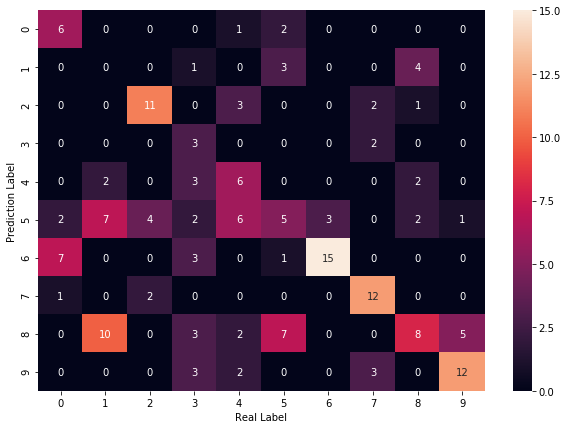

In [11]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [12]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:0 index:[1] real:5
#1 min_error:0 index:[7] real:2
#2 min_error:0 index:[4] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:0 index:[5] real:1
#5 min_error:0 index:[7] real:7
#6 min_error:0 index:[6] real:6
#7 min_error:1 index:[3 4 7 9] real:3
#8 min_error:0 index:[2] real:2
#9 min_error:0 index:[8] real:1
#10 min_error:0 index:[7] real:7
#11 min_error:0 index:[5] real:4
#12 min_error:0 index:[5] real:6
#13 min_error:1 index:[3 4 7 9] real:3
#14 min_error:0 index:[8] real:1
#15 min_error:0 index:[4] real:3
#16 min_error:0 index:[8] real:9
#17 min_error:0 index:[8] real:1
#18 min_error:1 index:[3 4 7 9] real:7
#19 min_error:0 index:[6] real:6
#20 min_error:0 index:[8] real:8
#21 min_error:0 index:[2] real:4
#22 min_error:1 index:[3 4 7 9] real:3
#23 min_error:0 index:[4] real:1
#24 min_error:0 index:[5] real:4
#25 min_error:0 index:[6] real:0
#26 min_error:0 index:[5] real:5
#27 min_error:0 index:[3] real:3
#28 min_error:0 index:[5] real:6
#29 min_error:0 index:[8] rea

In [13]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.4996907854050711
Avg Base Learner:0.8209647495361782


In [14]:
from random import randint

list_acc = []

for iii in range(4):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.1388888888888889
Accuracy on training set: 0.16111111111111112
Accuracy on training set: 0.2611111111111111
Accuracy on training set: 0.32222222222222224


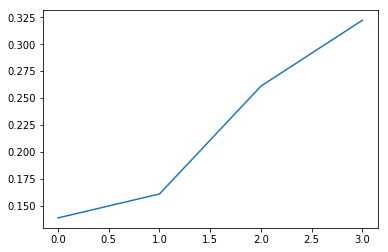

In [15]:
plt.plot(range(4),list_acc)
plt.show()

In [16]:
list_acc

[0.1388888888888889,
 0.16111111111111112,
 0.2611111111111111,
 0.32222222222222224]